**Projekt Regresyjny: Przewidywanie Ceny Nieruchomości na przykładzie danych z Bostonu**

W tym projekcie zamierzam wykorzystać zbiór danych Boston Housing Dataset, który zawiera informacje o różnych atrybutach nieruchomości w Bostonie. Celem analizy będzie stworzenie modelu regresji, który przewiduje ceny nieruchomości na podstawie tych atrybutów. Po podziale danych na zbiór treningowy i testowy, zastosować zamierzam model regresji liniowej i dokonać oceny jego wydajności, uzyskując satysfakcjonujące wyniki na podstawie miar Mean Squared Error (MSE) oraz R-squared.

**Krok 1. Załadowanie zbioru danych do projektu i biblioteki do analizy danych w Pythonie - Pandas**

Pierwszym krokiem jest wczytanie popularnej biblioteki do analizy danych - Pandas, a także próbki danych, które dostępne są w ramach biblioteki sklearn, a konkretniej sklearn.datasets.

In [23]:
from sklearn.datasets import load_boston
import pandas as pd

**Krok 2. Wczytanie danych**

W drugim kroku, za pomocą biblioteki Pandas chciałbym uzyskać wgląd w załączone dane, i uzyskać wgląd w pierwsze 10 wierszy.

In [24]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['PRICE'] = data.target #to chcemy przewidywać
print(df.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7

**Krok 3. Uzyskanie informacji o danych.**

Następnie chciałbym uzyskać informacje o zbiorze danych, tj. liczbie wierszy, kolumnach i typach danych.

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


**Krok 4. Podstawowe statystyki.**

Kolejno sprawdzam podstawowe statystyki dla danych, takie jak średnia, kwantyle, odchylenie standardowe czy wartość minimalna i maksymalna.

In [26]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

**Krok 5. Wczytanie bibliotek do wizualizacji danych - matplotlib i seaborn.**

W piątym kroku projektu przeprowadzam wizualną analizę danych, skupiając się na zrozumieniu wzorców i zależności między różnymi cechami. 

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

**Krok 6. Wykres korelacji**

Wykorzystując wykresy korelacji, można zbadać wzajemne relacje między atrybutami, co pozwoli zidentyfikować istotne zmienne w kontekście przewidywania cen nieruchomości. 

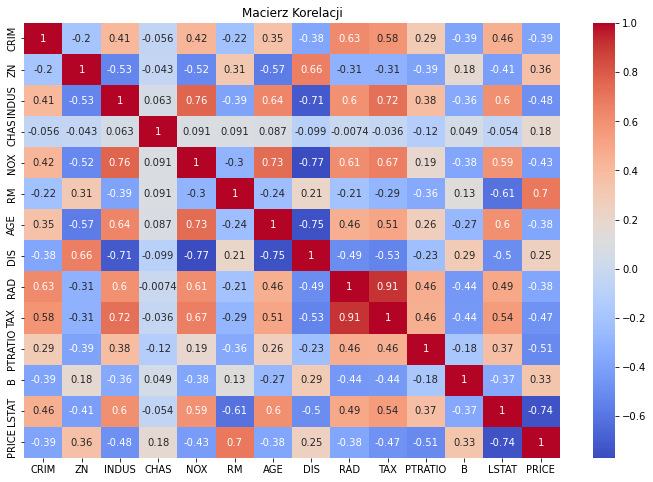

In [28]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz Korelacji')
plt.show()

Macierz korelacji to tabelaryczne zestawienie, które pokazuje współzależności pomiędzy różnymi zmiennymi w zbiorze danych. W przypadku analizy regresyjnej, macierz korelacji pozwala zrozumieć, jak zmienne są ze sobą powiązane.

Wartości w macierzy korelacji mieszczą się w zakresie od -1 do 1:

- 1 oznacza idealną dodatnią korelację - im jedna zmienna rośnie, tym druga rośnie w proporcji.
- -1 oznacza idealną ujemną korelację - im jedna zmienna rośnie, tym druga maleje w proporcji.
- 0 oznacza brak liniowej zależności między zmiennymi.

**Krok 7. Wykresy rozrzutu dla kilku istotnych cech**

Za pomocą wykresów rozrzutu zamierzam, zweryfikować potencjalne trendy i związki między poszczególnymi zmiennymi a ceną nieruchomości.

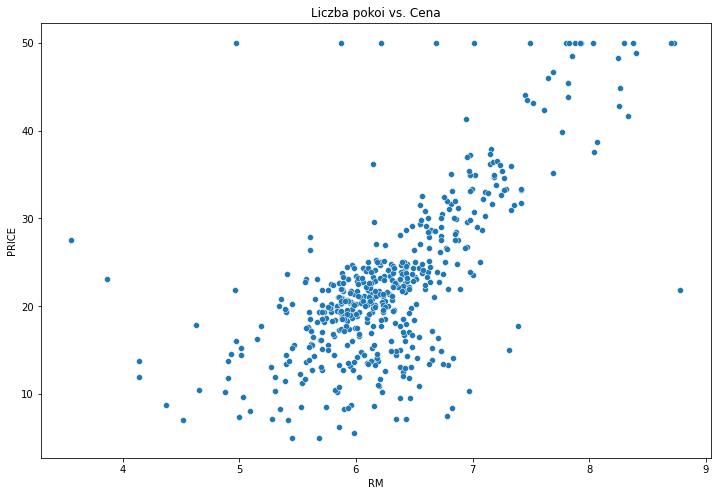

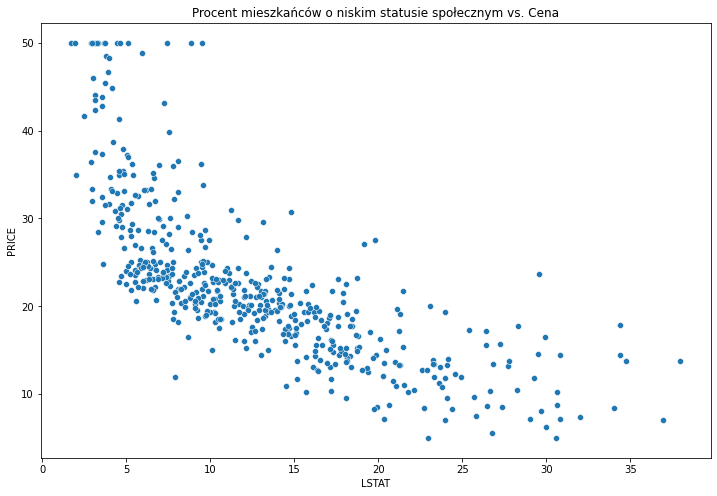

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='RM', y='PRICE', data=df)
plt.title('Liczba pokoi vs. Cena')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='LSTAT', y='PRICE', data=df)
plt.title('Procent mieszkańców o niskim statusie społecznym vs. Cena')
plt.show()

**Krok 8. Podział na zbiór treningowy i testowy.**

Dzielę dane na zbiór treningowy - takim na którym model się będzie szkolił, i na testowy - taki, na którym model będzie się sprawdzał w propircji 8:2.

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('PRICE', axis=1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Krok 9. Wybór modelu regresji.**

Tak jak było od początku założone w tym przypadku bardzo dobrze powinna sprawdzić się regresja liniowa.

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

**Krok 10. Ocena modelu.**

Gdy mamy już model należało by sprawdzić za pomocą odpowiednich metryk jak nasz model sobie radzi. Te metryki to błąd średnio - kwadratowy i R-kwadrat.

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R-squared: {r2}')

MSE: 24.29111947497371
R-squared: 0.6687594935356294


Dobrym pomysłem byłoby też zwizualizowanie regresji.

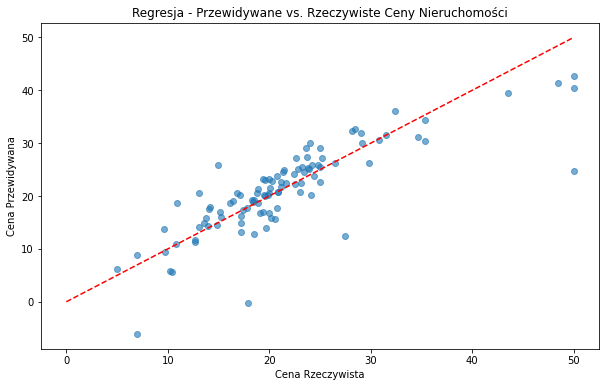

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(np.arange(0, 51), np.arange(0, 51), color='red', linestyle='--') 
plt.xlabel("Cena Rzeczywista")
plt.ylabel("Cena Przewidywana")
plt.title("Regresja - Przewidywane vs. Rzeczywiste Ceny Nieruchomości")
plt.show()

**Krok 11. Wnioski**

Ten projekt zawiera kompleksową analizę danych z Boston Housing Dataset, w tym przygotowanie danych, zastosowanie modelu regresji, a także ocenę wydajności modelu. Wyniki zostały zwizualizowane, a dodatkowo dokonano oceny za pomocą miar Mean Squared Error (MSE) oraz R-squared.